# Perform GSEA using GSEAPY  

Following the potocol defined here: https://gseapy.readthedocs.io/en/latest/gseapy_tutorial.html#use-gsea-command-or-gsea


In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # mac
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [2]:
gp.__version__

'0.9.9'

## 1. Prepare expression file
In our case, the expression file is the percentage of cells inside each pseudostate **bin**

In [3]:
gene_exp_alpha = pd.read_table("./dat/alpha.100_bin_pseudotime_raw.promoter.txt").transpose()
gene_exp_alpha.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
SAMD11,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.389105,0.469484,0.000000,...,0.000000,0.000000,0.000000,0.00,1.724138,0.000,0.000000,0.0,0.0,0.0
NOC2L,0.0,0.0,0.0,0.0,2.941176,4.477612,4.069767,4.280156,3.286385,4.109589,...,4.848485,7.333333,5.607477,8.75,5.172414,9.375,5.263158,30.0,0.0,0.0
KLHL17,0.0,0.0,0.0,0.0,2.941176,1.492537,2.325581,0.000000,0.938967,1.369863,...,1.212121,1.333333,0.934579,5.00,3.448276,3.125,10.526316,0.0,0.0,0.0
PLEKHN1,0.0,0.0,0.0,0.0,2.941176,0.000000,2.325581,0.389105,1.877934,4.109589,...,1.818182,4.666667,2.803738,6.25,8.620690,3.125,5.263158,30.0,0.0,50.0
HES4,0.0,0.0,0.0,0.0,2.941176,2.985075,2.906977,1.945525,5.164319,4.109589,...,12.121212,16.000000,14.953271,17.50,18.965517,31.250,21.052632,30.0,0.0,0.0


## 2. Phenotype file (.cls)
- The first line specify the total samples and phenotype numbers. Leave number 1 alway be 1.
- The second line specify the phenotype class(name).
- The third line specify column attributes in setp 1.

In [4]:
threshold_alpha=round(1.4265/1.9208*100)
threshold_alpha

74

In [5]:
with open('./dat/pheno.cls',"w") as f:
    f.write("100 2 1\n")
    f.write("#A1 A2\n")
    f.write("A1 "*threshold_alpha+("A2 "*(100-threshold_alpha)).rstrip()+"\n")

In [6]:
phenoA, phenoB, class_vector =  gp.parser.gsea_cls_parser("./dat/pheno.cls")
#class_vector used to indicate group attributes for each sample
print(class_vector)

['A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2']


In [7]:
print("positively correlated: ", phenoA)

positively correlated:  A1


In [8]:
print("negtively correlated: ", phenoB)


negtively correlated:  A2


## 3. define gene sets

In our case, we will use the beta gene sets from the three literature. And save to [gmt](http://software.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats#GMT:_Gene_Matrix_Transposed_file_format_.28.2A.gmt.29) format.

It was done in another [notebook](./compare_with_previous_glists.ipynb)

## 4. Run gsea

In [9]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name

gs_res = gp.gsea(data=gene_exp_alpha, # or data='./P53_resampling_data.txt'
                 gene_sets='./dat/glists/gsea.gmt', # enrichr library names or gmt file
                 cls= class_vector, # cls=class_vector
                 #set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 min_size=0,
                 max_size=4000,
                 processes=4,
                 format='png')

In [10]:
#access the dataframe results throught res2d attribute
gs_res.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
A1_alpha,0.886078,2.998889,0.000000,0.000000,240,237,TMCO2;MAPK10;GALNT8;C8B;GCK;GCG;PGAM2;SYT10;SM...,TMCO2;MAPK10;GALNT8;C8B;GCK;GCG;PGAM2;SYT10;SM...
A2_alpha,-0.894123,-2.742450,0.000000,0.000000,3526,3526,FFAR4;SLC35D3;UGGT2;RNPS1;GNL3;HEATR5A;REEP5;S...,COBLL1;USP9X;SETBP1;TRIM41;ZNF326;ACSL1;C15orf...
B1_beta,0.616985,2.395541,0.000000,0.000000,75,74,G6PC2;SLC25A34;NEUROD1;KCNA5;IGFBP1;RSPO3;MS4A...,G6PC2;SLC25A34;NEUROD1;KCNA5;IGFBP1;RSPO3;MS4A...
B2_beta,-0.552261,-1.926866,0.000000,0.000000,420,420,CAST;NT5M;ZNF684;PSAT1;SLC7A11;SCEL;PRMT2;PLA2...,PPA1;RAB3GAP1;TRPC4AP;FBXO11;SLC2A11;SNX27;MRO...
Beta sub4_xin,-0.382072,-1.523799,0.000000,0.092437,390,323,GCG;PSMF1;MMP7;AUP1;HSPD1;DNAJC12;LURAP1L;CCT6...,SNRPB2;LMNA;CNBP;MANF;MYL12B;TAF12;C1orf52;SAP...
Beta sub1_xin,0.397355,1.125399,0.333333,0.274725,13,11,SCGB2A1;RBP4;FFAR4;PPP1R1A;SCGN;FXYD2;TUBA4A;P...,SCGB2A1;RBP4;FFAR4;PPP1R1A;SCGN
immature_bader,-0.330818,-1.303297,0.125000,0.277311,579,441,GCK;PSMF1;G6PC2;SV2A;SYTL4;CDHR1;SLC7A8;GPC4;D...,BBS9;STAU1;DUSP12;MRPS18A;SRP9;DVL3;ENSA;KLHL2...
mature_bader,-0.312947,-1.197606,0.333333,0.536134,72,42,SRGAP3;NPFFR2;GPR83;SYTL2;NHSL1;SYT1;SVEP1;ITG...,C19orf57;KCNV1;N4BP3;PLD1;RAD54L;SLC6A12;GRIA3...
ST8SIA1+_dorrell,-0.363776,-1.167189,0.363636,0.539216,46,35,TFF3;KCNJ8;OPCML;ATP8A2;MYOM1;GAP43;SULF2;RBM4...,DAB1;CREB3L1;KCND3;TMEM130;CHD5;NEFM;PDK4;CDR2...


### show the results 
The **gsea** module will generate heatmap for genes in each gene sets in the backgroud.
But if you need to do it yourself, use the code below

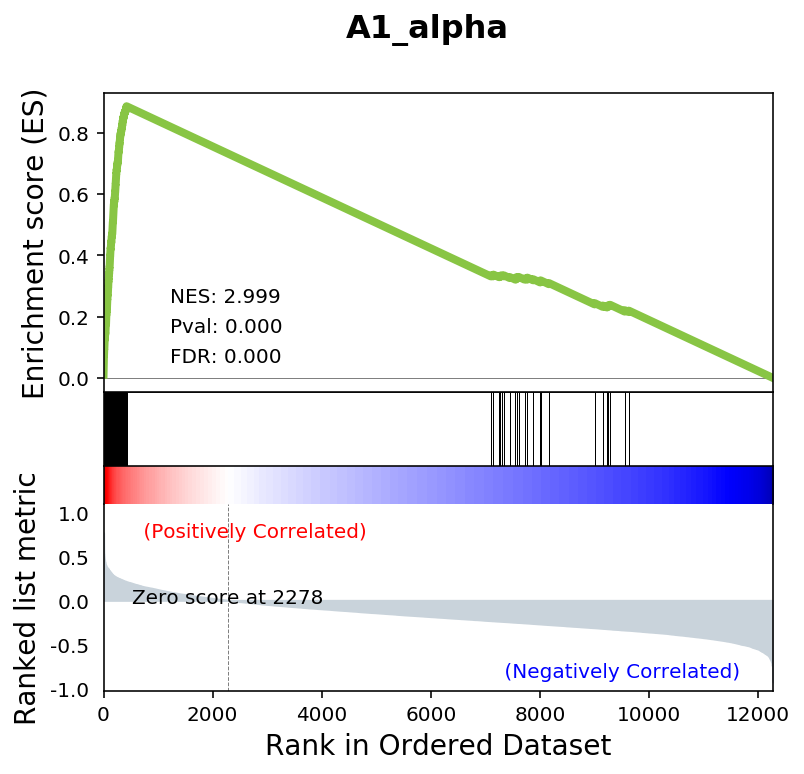

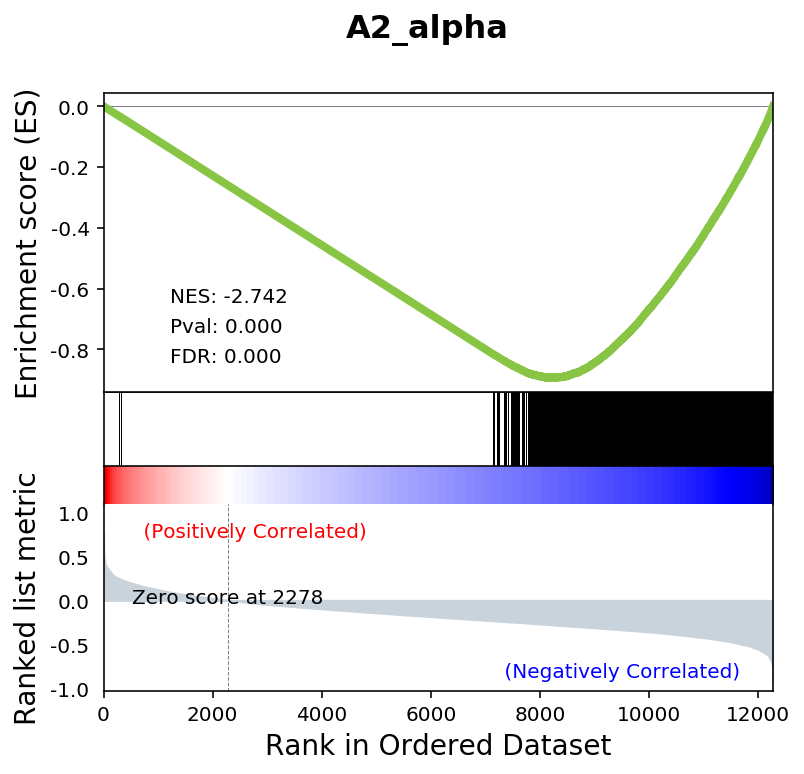

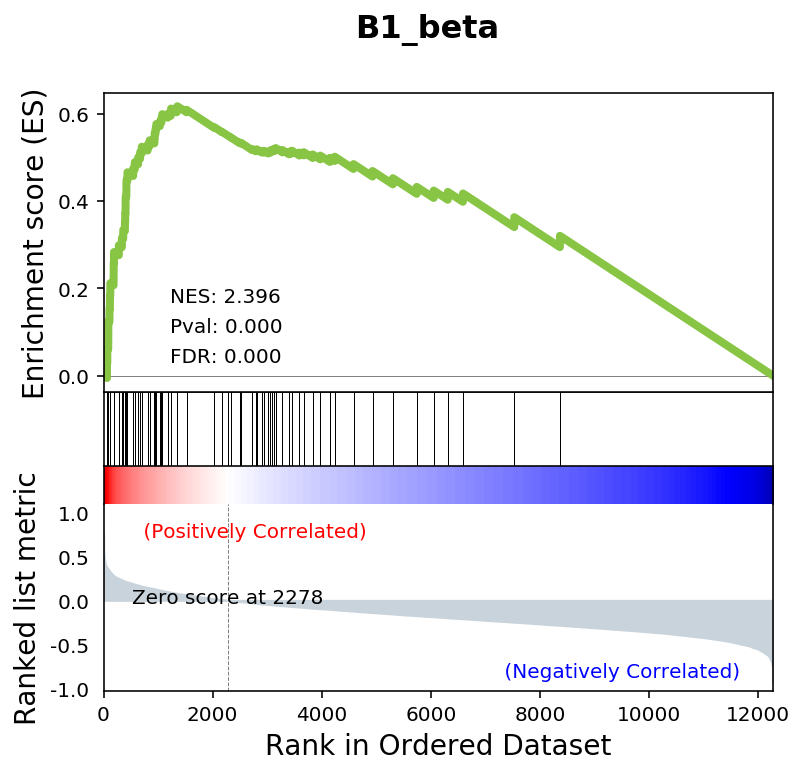

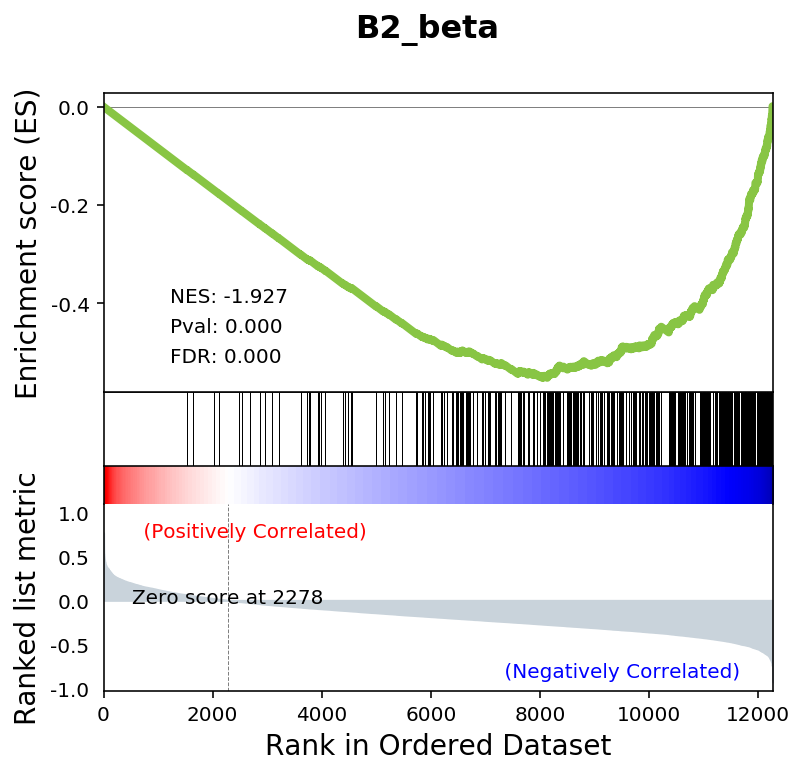

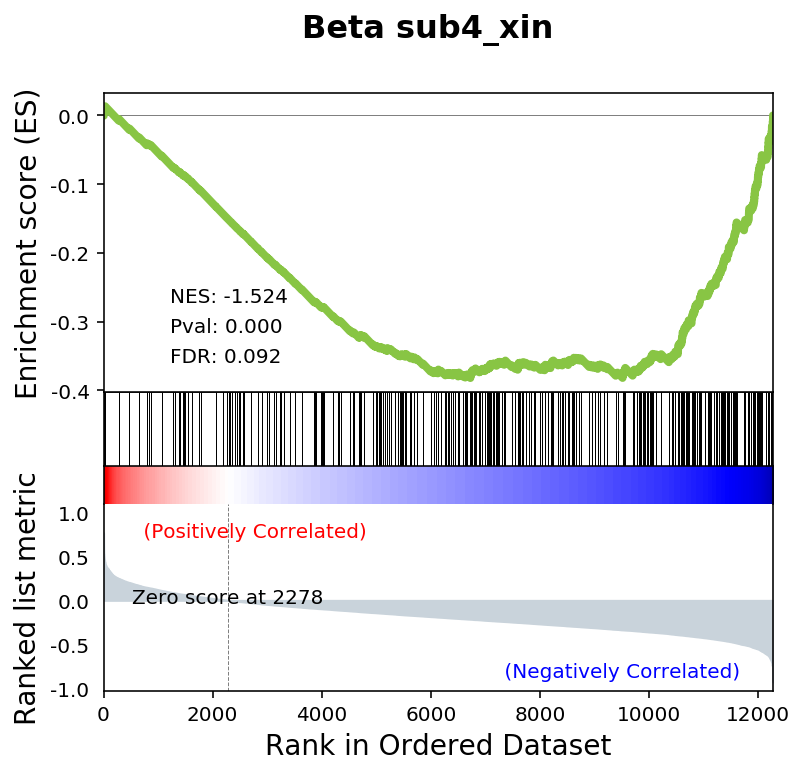

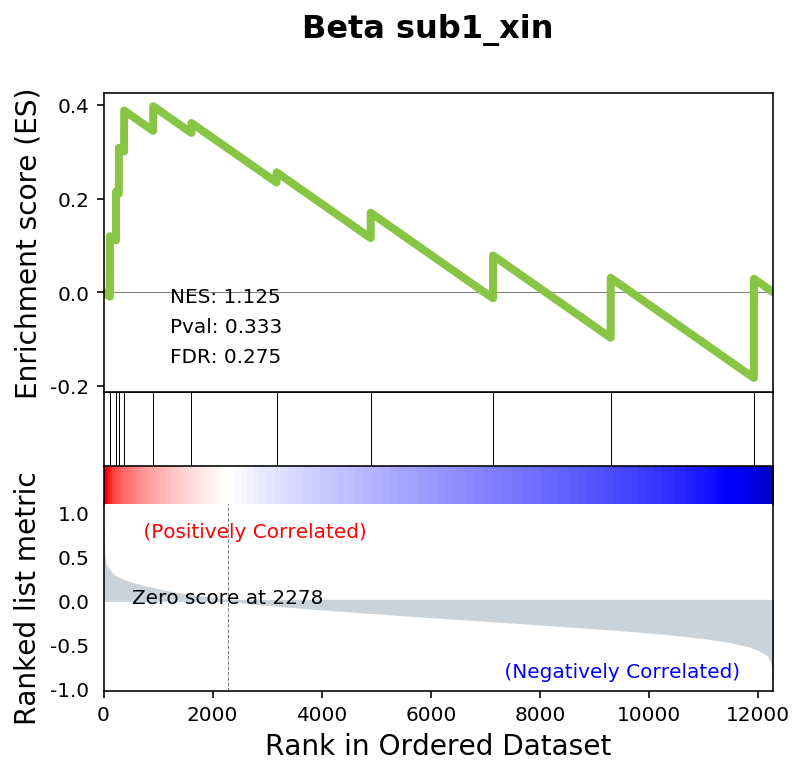

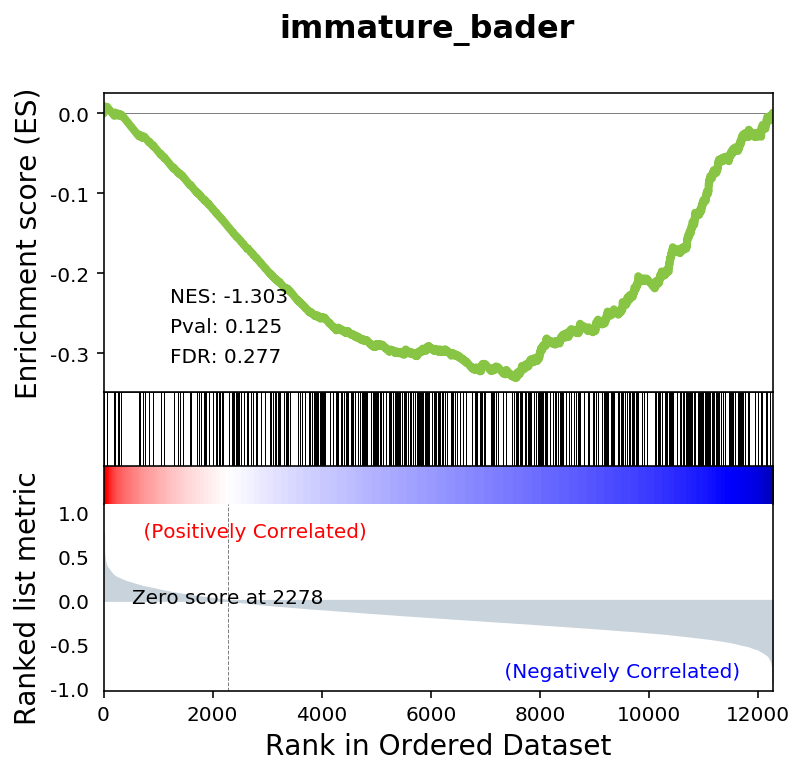

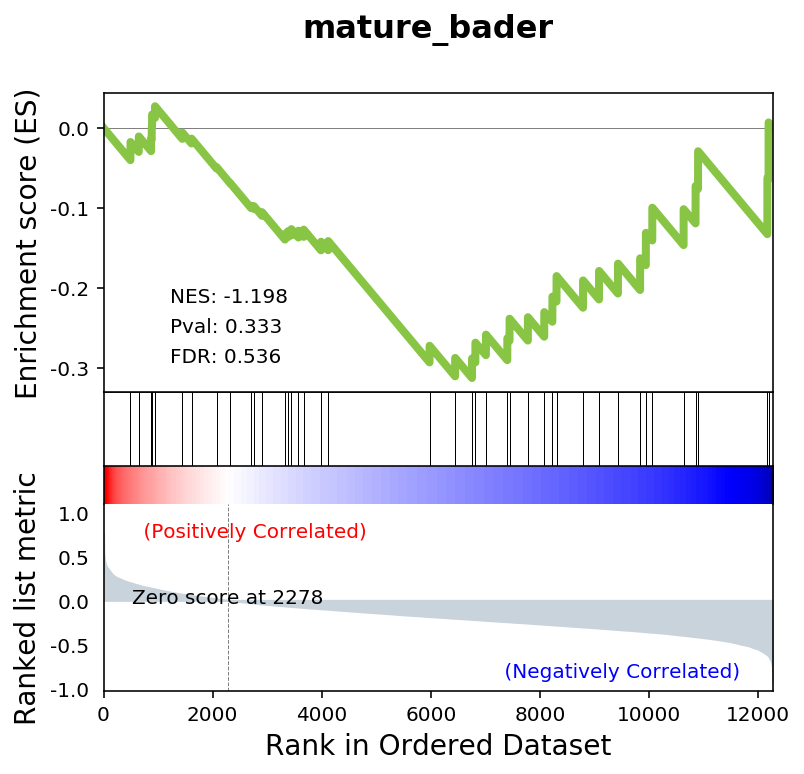

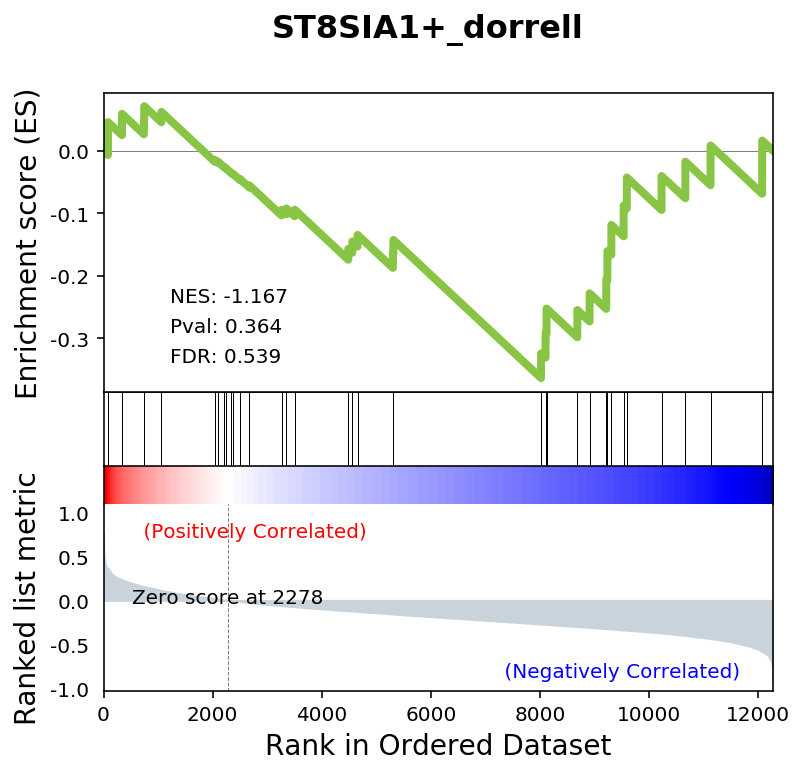

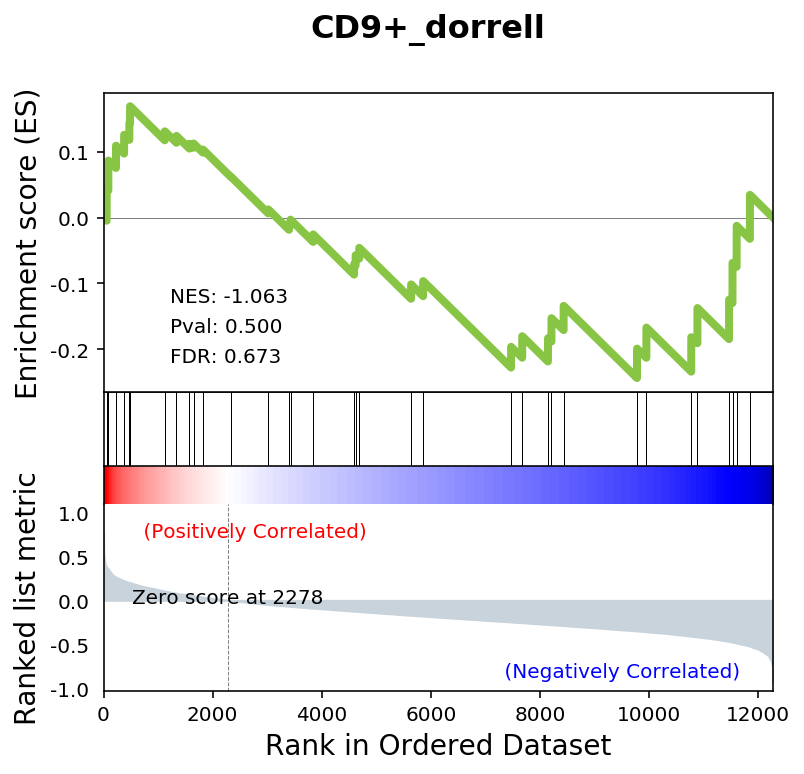

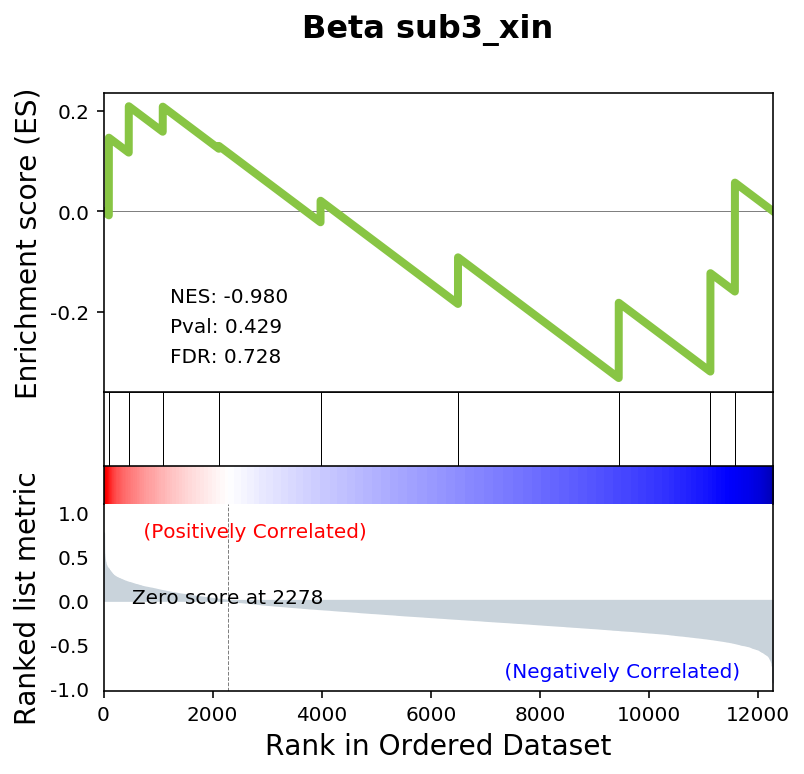

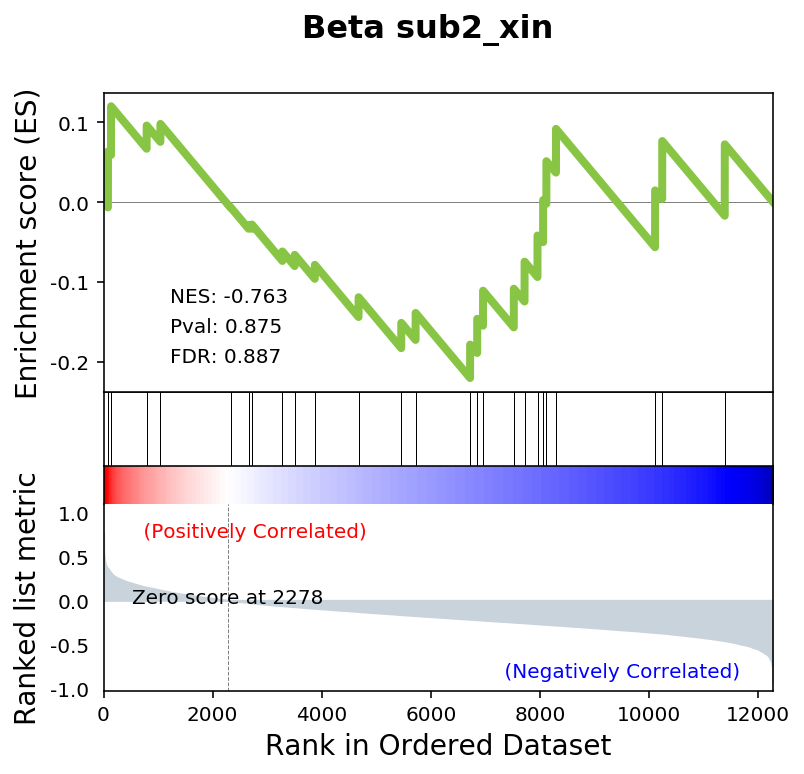

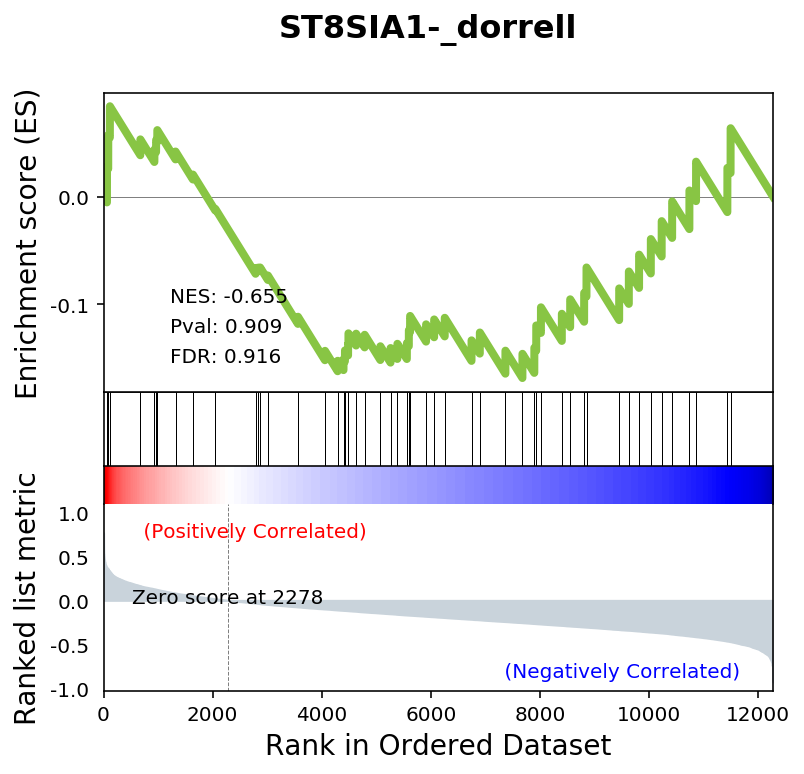

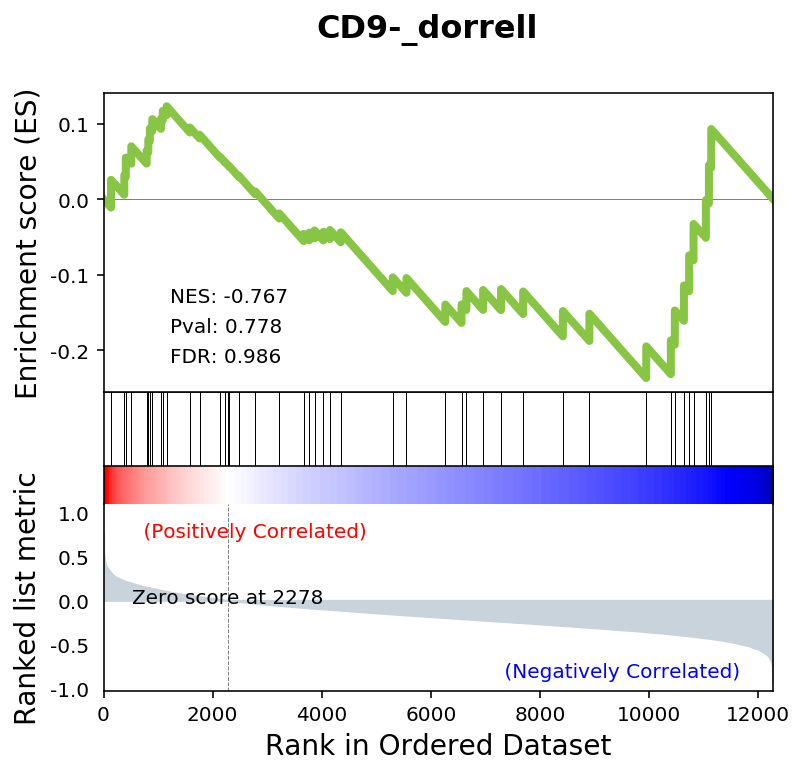

In [11]:
from gseapy.plot import gseaplot, heatmap
terms = gs_res.res2d.index
for i in range(len(terms)):
    gseaplot(gs_res.ranking, term=terms[i], **gs_res.results[terms[i]],ofname=terms[i]+'.png')


In [13]:
for i in range(len(terms)):
    gseaplot(gs_res.ranking, term=terms[i], **gs_res.results[terms[i]],ofname=terms[i]+'.png')